# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [4]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from wordcloud import WordCloud

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [5]:
# Change the display properties of pandas to max
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [6]:
# Import the first file - True.csv
true_news = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_news = pd.read_csv('Fake.csv')

print('True news imported', len(true_news))
print('Fake news imported', len(fake_news))

True news imported 21417
Fake news imported 23523


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [7]:
# Inspect the DataFrame with True News to understand the given data
true_news.sample(1)

,title,text,date
4443,Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday,"(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while a...","April 13, 2017"


In [8]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news.sample(1)

,title,text,date
16661,’60 MINUTES’: 9/11 REPORT Could Incriminate Saudi Arabia With These Details,There s been tons of speculation about possible involvement by Saudi Arabia in the 9/11 terror attack. The 28-page report has been classified but many are calling for the papers to be released. Many details have trickled out but Americans should know the role Saudi Arabia played in supporting the 9/11 terrorists:Tim Roemer told 60 Minutes the two Saudi nationals found a way to gain access to housing and flight lessons upon their arrival despite extremely limited language skills and no exp...,"Apr 12, 2016"


In [9]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [10]:
# Descriptive statistics of string lengths for True News
true_news.apply(lambda x: x.apply(lambda x: len(x))).describe().round(2)

,title,text,date
count,21417.00,21417.00,21417.00
mean,64.67,2383.28,16.72
std,9.17,1684.84,1.74
min,26.00,1.00,12.00
25%,59.00,914.00,16.00
50%,64.00,2222.00,17.00
75%,70.00,3237.00,18.00
max,133.00,29781.00,19.00


In [11]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [12]:
# Descriptive statistics of string lengths for Fake News
fake_news.apply(lambda x: x.apply(lambda x: len(str(x)))).describe().round(2)

,title,text,date
count,23523.00,23523.00,23523.00
mean,94.15,2534.79,13.19
std,27.71,2409.69,5.23
min,3.00,1.00,3.00
25%,77.00,1426.00,12.00
50%,90.00,2164.00,12.00
75%,105.00,3029.00,14.00
max,480.00,32759.00,388.00


In [13]:
# Print the column names of both DataFrames
print('True news columns:', true_news.columns)
print('Fake news columns:', fake_news.columns)

True news columns: Index(['title', 'text', 'date'], dtype='object')
Fake news columns: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [14]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [15]:
# Combine the true and fake news DataFrames into a single DataFrame
news_data = pd.concat([true_news, fake_news], axis=0)

In [16]:
# Shuffling indices for better model training
idx = np.arange(len(news_data))
np.random.shuffle(idx)

news_data = news_data.iloc[idx, :]
news_data.reset_index(drop= True, inplace= True)

In [17]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_data.head()

,title,text,date,news_label
0,Report: Trump Talking To Fox News Birther For Administration Job,"Donald Trump is considering a prominent supporter of the birther conspiracy theory from Fox News for a position in his administration, according to a report. Trump is reportedly mulling over a spot for Eric Bolling to be part of his Commerce Department.Fox News host Eric Bolling has discussed the possibility of taking a position in Donald Trump s administration, two sources with knowledge of the discussions tell POLITICO.The position being discussed is in the Department of Commerce, though n...","November 20, 2016",0
1,Elizabeth Warren BURIES Trump After He Throws Temper Tantrum Over Her Attacks,"Donald Trump and Elizabeth Warren are engaged in a Twitter feud for the ages and she s kicking his ass.On Saturday, the Massachusetts Senator ripped the Republican nominee to shreds for picking Indiana Governor Mike Pence as his running mate on the 2016 ticket..@realDonaldTrump & @mike_pence are a perfect match: Two small, insecure, weak men who use hate & fear to divide our country & our people. Elizabeth Warren (@elizabethforma) July 16, 2016 Of COURSE @realDonaldTrump a guy who calls w...","July 17, 2016",0
2,Fundraisers make pitch for Trump at hedge fund conference,"LAS VEGAS (Reuters) - Top fundraisers for Donald Trump made pitches on Wednesday to prominent hedge fund investors to line up behind the presumptive Republican presidential nominee as he seeks to raise $1 billion for the general election campaign. The New York billionaire businessman was a topic of discussion as some 2,000 hedge fund managers, investors, lawyers and journalists gathered in Las Vegas for the SkyBridge Alternatives Conference, known as SALT, the industry’s most prominent annua...","May 12, 2016",1
3,(VIDEO) BUSTED! YOU’LL NEVER BELIEVE WHO ELSE TOLD THE COPS IN BALTIMORE TO “BACK OFF”,This is the Baltimore State s Attorney Marilyn Mosby s husband At the 2:37 mark he says he told the police to back off . His wife is prosecuting the cops in the Freddie Gray case. The accused cops have asked the judge for a change of venue great idea!,"Jun 4, 2015",0
4,“REVEREND” AL SHARPTON Makes Up Lie About Jesus On Social Media To Push Refugee Invasion,"Hey Al you do realize that Obama was more than happy to give jobs that should have gone to the black communities to refugees, don t you? Before you head to church today, remember to thank God for his son, Jesus a refugee who fled to Egypt. Reverend Al Sharpton (@TheRevAl) January 29, 2017Here are a few responses to Sharpton s lie on Twitter:@Wargs77 @jccolange @StephenKing umm, his parents weren't refugees. They traveled to pay their taxes. Please Al MC (@mcolange) January 29, 2017This one...","Jan 30, 2017",0


In [18]:
# Check for consistency of length
len(news_data) == len(true_news) + len(fake_news)

True

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [19]:
# Check Presence of Null Values
news_data.isnull().sum() / len(news_data) * 100

title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64

Percent null value <1 hence such rows are dropped

In [20]:
# Handle Rows with Null Values
news_data.dropna(axis= 0, inplace=True)
news_data.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

In [21]:
len(news_data)

44898

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [22]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_data['news_text'] = news_data['title'] + ' ' + news_data['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_data.drop(['title', 'text', 'date'], axis= 1, inplace= True)

# Display the first 5 rows of the updated DataFrame to check the result
news_data.head()


,news_label,news_text
0,0,"Report: Trump Talking To Fox News Birther For Administration Job Donald Trump is considering a prominent supporter of the birther conspiracy theory from Fox News for a position in his administration, according to a report. Trump is reportedly mulling over a spot for Eric Bolling to be part of his Commerce Department.Fox News host Eric Bolling has discussed the possibility of taking a position in Donald Trump s administration, two sources with knowledge of the discussions tell POLITICO.The p..."
1,0,"Elizabeth Warren BURIES Trump After He Throws Temper Tantrum Over Her Attacks Donald Trump and Elizabeth Warren are engaged in a Twitter feud for the ages and she s kicking his ass.On Saturday, the Massachusetts Senator ripped the Republican nominee to shreds for picking Indiana Governor Mike Pence as his running mate on the 2016 ticket..@realDonaldTrump & @mike_pence are a perfect match: Two small, insecure, weak men who use hate & fear to divide our country & our people. Elizabeth Warren..."
2,1,"Fundraisers make pitch for Trump at hedge fund conference LAS VEGAS (Reuters) - Top fundraisers for Donald Trump made pitches on Wednesday to prominent hedge fund investors to line up behind the presumptive Republican presidential nominee as he seeks to raise $1 billion for the general election campaign. The New York billionaire businessman was a topic of discussion as some 2,000 hedge fund managers, investors, lawyers and journalists gathered in Las Vegas for the SkyBridge Alternatives Conf..."
3,0,(VIDEO) BUSTED! YOU’LL NEVER BELIEVE WHO ELSE TOLD THE COPS IN BALTIMORE TO “BACK OFF” This is the Baltimore State s Attorney Marilyn Mosby s husband At the 2:37 mark he says he told the police to back off . His wife is prosecuting the cops in the Freddie Gray case. The accused cops have asked the judge for a change of venue great idea!
4,0,"“REVEREND” AL SHARPTON Makes Up Lie About Jesus On Social Media To Push Refugee Invasion Hey Al you do realize that Obama was more than happy to give jobs that should have gone to the black communities to refugees, don t you? Before you head to church today, remember to thank God for his son, Jesus a refugee who fled to Egypt. Reverend Al Sharpton (@TheRevAl) January 29, 2017Here are a few responses to Sharpton s lie on Twitter:@Wargs77 @jccolange @StephenKing umm, his parents weren't refug..."


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [23]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_data['news_label'].copy()

df_clean.head()

,news_label
0,0
1,0
2,1
3,0
4,0


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [24]:
def preprocess_text(text):

# Convert to lower case
    text = text.lower()

# Remove text in square bracket    
    text = re.sub(r'\[\w+\]', r'', text)    

# Shorten abbreviations
    shorten = lambda x: x.group().replace('.', '')
    re.sub(r"\b([a-z]\.)+[a-z]?\b\.?", shorten, text)

# Remove punctuations
    text = re.sub(r'[?.,!;:\-]', r' ', text)

# Remove quotation marks    
    text = re.sub(r'[“”‘’\'"]', r'', text)

# Remove text with numbers
    text = re.sub(r'\d+', r'', text)

# Remove other special characters like $
    text = re.sub(r'[^a-zA-Z]+', r' ', text)

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [25]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text'] = news_data['news_text'].progress_apply(lambda x: preprocess_text(x))

df_clean.head()

100%|██████████| 44898/44898 [00:06<00:00, 7208.57it/s]


,news_label,news_text
0,0,report trump talking to fox news birther for administration job donald trump is considering a prominent supporter of the birther conspiracy theory from fox news for a position in his administration according to a report trump is reportedly mulling over a spot for eric bolling to be part of his commerce department fox news host eric bolling has discussed the possibility of taking a position in donald trump s administration two sources with knowledge of the discussions tell politico the posit...
1,0,elizabeth warren buries trump after he throws temper tantrum over her attacks donald trump and elizabeth warren are engaged in a twitter feud for the ages and she s kicking his ass on saturday the massachusetts senator ripped the republican nominee to shreds for picking indiana governor mike pence as his running mate on the ticket realdonaldtrump mike pence are a perfect match two small insecure weak men who use hate fear to divide our country our people elizabeth warren elizabethforma july...
2,1,fundraisers make pitch for trump at hedge fund conference las vegas reuters top fundraisers for donald trump made pitches on wednesday to prominent hedge fund investors to line up behind the presumptive republican presidential nominee as he seeks to raise billion for the general election campaign the new york billionaire businessman was a topic of discussion as some hedge fund managers investors lawyers and journalists gathered in las vegas for the skybridge alternatives conference known as ...
3,0,video busted youll never believe who else told the cops in baltimore to back off this is the baltimore state s attorney marilyn mosby s husband at the mark he says he told the police to back off his wife is prosecuting the cops in the freddie gray case the accused cops have asked the judge for a change of venue great idea
4,0,reverend al sharpton makes up lie about jesus on social media to push refugee invasion hey al you do realize that obama was more than happy to give jobs that should have gone to the black communities to refugees don t you before you head to church today remember to thank god for his son jesus a refugee who fled to egypt reverend al sharpton thereval january here are a few responses to sharpton s lie on twitter wargs jccolange stephenking umm his parents werent refugees they traveled to pay t...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [26]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
nlp_pos = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def word_filter(text):
    text = ' '.join([tok.lemma_ for tok in nlp_pos(text) 
                     if tok.tag_ in ['NN', 'NNS'] or tok.lemma_ not in stopwords.words('english')])
    
    return text

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [27]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemmatized'] = df_clean['news_text'].progress_apply(lambda x: word_filter(x))
df_clean.head()

100%|██████████| 44898/44898 [29:09<00:00, 25.67it/s]


,news_label,news_text,news_text_lemmatized
0,0,report trump talking to fox news birther for administration job donald trump is considering a prominent supporter of the birther conspiracy theory from fox news for a position in his administration according to a report trump is reportedly mulling over a spot for eric bolling to be part of his commerce department fox news host eric bolling has discussed the possibility of taking a position in donald trump s administration two sources with knowledge of the discussions tell politico the posit...,report trump talk fox news birther administration job donald trump consider prominent supporter birther conspiracy theory fox news position administration accord report trump reportedly mull spot eric bolling part commerce department fox news host eric bolling discuss possibility take position donald trump administration two source knowledge discussion tell politico position discuss department commerce though nothing offer yet bolle co host five early trump supporter spot trump tower new y...
1,0,elizabeth warren buries trump after he throws temper tantrum over her attacks donald trump and elizabeth warren are engaged in a twitter feud for the ages and she s kicking his ass on saturday the massachusetts senator ripped the republican nominee to shreds for picking indiana governor mike pence as his running mate on the ticket realdonaldtrump mike pence are a perfect match two small insecure weak men who use hate fear to divide our country our people elizabeth warren elizabethforma july...,elizabeth warren burie trump throw temper tantrum attack donald trump elizabeth warren engage twitter feud age kick ass saturday massachusetts senator rip republican nominee shred pick indiana governor mike pence running mate ticket realdonaldtrump mike pence perfect match two small insecure weak man use hate fear divide country people elizabeth warren elizabethforma july course realdonaldtrump guy call woman fat pig bimbo pick vp famous try control woman body elizabeth warren elizabethfor...
2,1,fundraisers make pitch for trump at hedge fund conference las vegas reuters top fundraisers for donald trump made pitches on wednesday to prominent hedge fund investors to line up behind the presumptive republican presidential nominee as he seeks to raise billion for the general election campaign the new york billionaire businessman was a topic of discussion as some hedge fund managers investors lawyers and journalists gathered in las vegas for the skybridge alternatives conference known as ...,fundraiser make pitch trump hedge fund conference las vegas reuter top fundraiser donald trump make pitch wednesday prominent hedge fund investor line behind presumptive republican presidential nominee seek raise billion general election campaign new york billionaire businessman topic discussion hedge fund manager investor lawyer journalist gather las vegas skybridge alternative conference know salt industry prominent annual meeting steven mnuchin trump newly appoint national finance chairma...
3,0,video busted youll never believe who else told the cops in baltimore to back off this is the baltimore state s attorney marilyn mosby s husband at the mark he says he told the police to back off his wife is prosecuting the cops in the freddie gray case the accused cops have asked the judge for a change of venue great idea,video bust never believe else tell cop baltimore back baltimore state attorney marilyn mosby husband mark say tell police back wife prosecute cop freddie gray case accuse cop ask judge change venue great idea
4,0,reverend al sharpton makes up lie about jesus on social media to push refugee invasion hey al you do realize that obama was more than happy to give jobs that should have gone to the black communities to refugees don t you before you head to church today remember to thank god for his son jesus a refugee who fled to egypt reverend al sharpton thereval january here are a few responses to sharpton s lie on twit

### Save the Cleaned data as a csv file (Recommended)

In [28]:
# Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [29]:
# Check the first few rows of the DataFrame
df_clean = pd.read_csv("clean_df.csv")
df_clean.head()

,news_label,news_text,news_text_lemmatized
0,0,report trump talking to fox news birther for administration job donald trump is considering a prominent supporter of the birther conspiracy theory from fox news for a position in his administration according to a report trump is reportedly mulling over a spot for eric bolling to be part of his commerce department fox news host eric bolling has discussed the possibility of taking a position in donald trump s administration two sources with knowledge of the discussions tell politico the posit...,report trump talk fox news birther administration job donald trump consider prominent supporter birther conspiracy theory fox news position administration accord report trump reportedly mull spot eric bolling part commerce department fox news host eric bolling discuss possibility take position donald trump administration two source knowledge discussion tell politico position discuss department commerce though nothing offer yet bolle co host five early trump supporter spot trump tower new y...
1,0,elizabeth warren buries trump after he throws temper tantrum over her attacks donald trump and elizabeth warren are engaged in a twitter feud for the ages and she s kicking his ass on saturday the massachusetts senator ripped the republican nominee to shreds for picking indiana governor mike pence as his running mate on the ticket realdonaldtrump mike pence are a perfect match two small insecure weak men who use hate fear to divide our country our people elizabeth warren elizabethforma july...,elizabeth warren burie trump throw temper tantrum attack donald trump elizabeth warren engage twitter feud age kick ass saturday massachusetts senator rip republican nominee shred pick indiana governor mike pence running mate ticket realdonaldtrump mike pence perfect match two small insecure weak man use hate fear divide country people elizabeth warren elizabethforma july course realdonaldtrump guy call woman fat pig bimbo pick vp famous try control woman body elizabeth warren elizabethfor...
2,1,fundraisers make pitch for trump at hedge fund conference las vegas reuters top fundraisers for donald trump made pitches on wednesday to prominent hedge fund investors to line up behind the presumptive republican presidential nominee as he seeks to raise billion for the general election campaign the new york billionaire businessman was a topic of discussion as some hedge fund managers investors lawyers and journalists gathered in las vegas for the skybridge alternatives conference known as ...,fundraiser make pitch trump hedge fund conference las vegas reuter top fundraiser donald trump make pitch wednesday prominent hedge fund investor line behind presumptive republican presidential nominee seek raise billion general election campaign new york billionaire businessman topic discussion hedge fund manager investor lawyer journalist gather las vegas skybridge alternative conference know salt industry prominent annual meeting steven mnuchin trump newly appoint national finance chairma...
3,0,video busted youll never believe who else told the cops in baltimore to back off this is the baltimore state s attorney marilyn mosby s husband at the mark he says he told the police to back off his wife is prosecuting the cops in the freddie gray case the accused cops have asked the judge for a change of venue great idea,video bust never believe else tell cop baltimore back baltimore state attorney marilyn mosby husband mark say tell police back wife prosecute cop freddie gray case accuse cop ask judge change venue great idea
4,0,reverend al sharpton makes up lie about jesus on social media to push refugee invasion hey al you do realize that obama was more than happy to give jobs that should have gone to the black communities to refugees don t you before you head to church today remember to thank god for his son jesus a refugee who fled to egypt reverend al sharpton thereval january here are a few responses to sharpton s lie on twit

In [30]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [31]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
dtype: int64

In [32]:
# Word counts descriptive statistics for each columns
df_clean[['news_text', 'news_text_lemmatized']].apply(lambda x: x.apply(lambda x: len(x))).describe().round(2)

,news_text,news_text_lemmatized
count,44898.00,44898.00
mean,2446.21,1693.93
std,1926.92,1331.05
min,23.00,20.00
25%,1269.00,886.00
50%,2195.00,1501.00
75%,3081.00,2116.75
max,31622.00,21986.00


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [33]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_clean, train_size=0.7, stratify=df_clean['news_label'])

print('Train/test split shapes')
print(df_train.shape)
print(df_test.shape)

print('\nTrain/test split label proportions')
print(df_train['news_label'].value_counts(normalize= True))
print(df_test['news_label'].value_counts(normalize= True))

Train/test split shapes
(31428, 3)
(13470, 3)

Train/test split label proportions
news_label
0    0.522973
1    0.477027
Name: proportion, dtype: float64
news_label
0    0.523014
1    0.476986
Name: proportion, dtype: float64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [34]:
df_train.columns

Index(['news_label', 'news_text', 'news_text_lemmatized'], dtype='object')

In [35]:
# Add a new column to calculate the character length of cleaned news text
df_train['news_text_len'] = df_train['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['news_text_lemm_len'] = df_train['news_text_lemmatized'].apply(lambda x: len(x))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

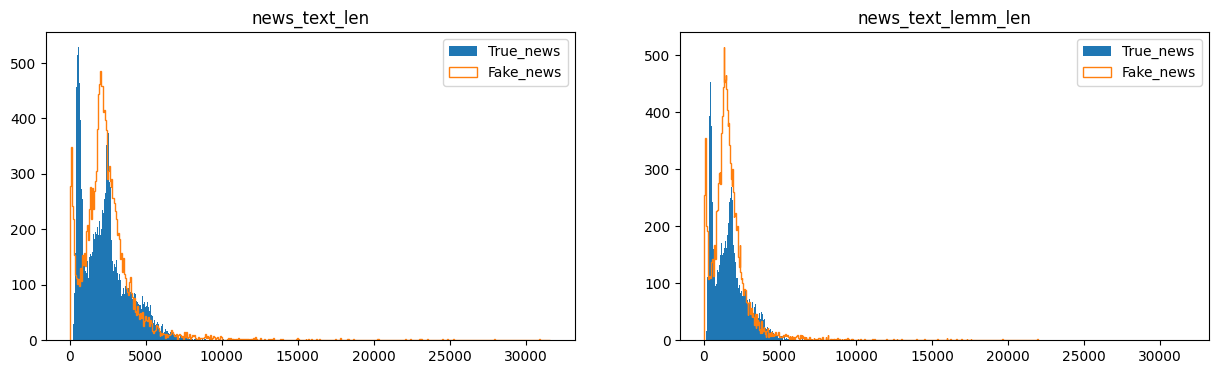

In [36]:
# Create a histogram plot to visualise character lengths
bins= 500
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col in zip(axes, ['news_text_len', 'news_text_lemm_len']):
    ax.hist(df_train.loc[df_train['news_label']==1, col], bins= bins, label='True_news')
    ax.hist(df_train.loc[df_train['news_label']==0, col], bins= bins, label='Fake_news', histtype= 'step')
    ax.set_title(f'{col}')
    ax.legend()
    
# Add histogram for lemmatized news text with POS tags removed


plt.show()

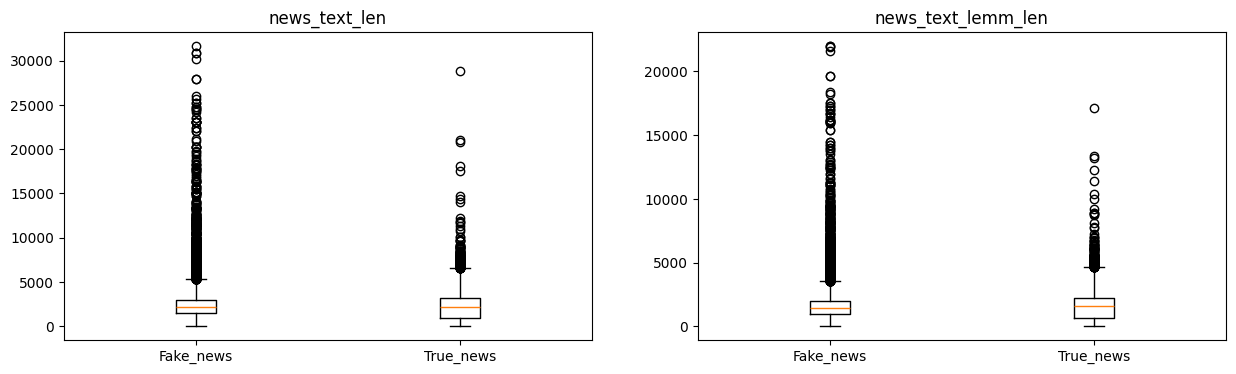

In [37]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add histogram for cleaned news text
for ax, col in zip(axes, ['news_text_len', 'news_text_lemm_len']):
    ax.boxplot([df_train.loc[df_train['news_label']==val, col].values for val in [0, 1]])
    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    ax.set_title(f'{col}')
    
# Add histogram for lemmatized news text with POS tags removed

plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [38]:
# Function to extract spacy entity types of top words from a wordcloud
def get_ent_types(string, nwords):
    wcloud = WordCloud(max_words=nwords).generate(string)
    ent_dict = {}
    for word in wcloud.words_.keys():
        for tok in nlp(word):
            if len(tok.ent_type_):
                d = {tok.ent_type_: ent_dict.get(tok.ent_type_, 0) + 1}
                ent_dict.update(d)
    return pd.Series(ent_dict.values(), index= ent_dict.keys(), name='ent_types')

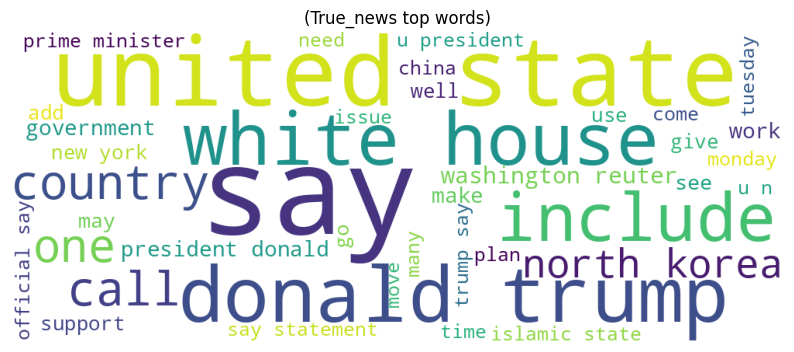

In [39]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color="white").generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis("off")
plt.title('(True_news top words)')
plt.show()

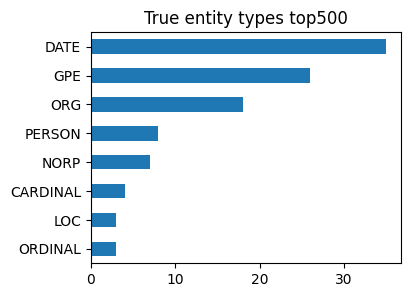

In [40]:
# Get entity types of top 500 words of true news
nwords= 500
get_ent_types(true_string, nwords).sort_values().plot.barh(figsize=(4, 3), title=f'True entity types top{nwords}')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

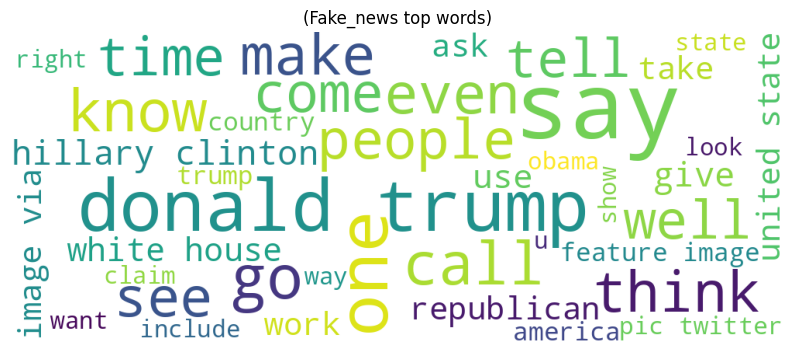

In [41]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation=None)
plt.axis("off")
plt.title('(Fake_news top words)')
plt.show()

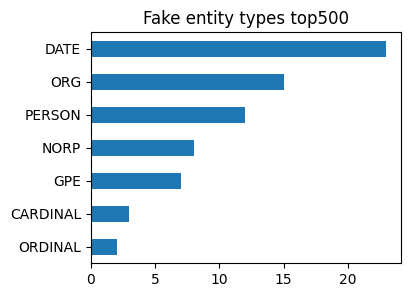

In [42]:
# Get entity types of top 500 words of true news
nwords = 500
get_ent_types(fake_string, nwords).sort_values().plot.barh(figsize=(4, 3), title=f'Fake entity types top{nwords}')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [43]:
# Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams, topn=10):
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0) / len(tx_list) * 100).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [44]:
# Handle NaN values in the text data
df_train.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

<Axes: title={'center': 'True news top-10 unigrams'}>

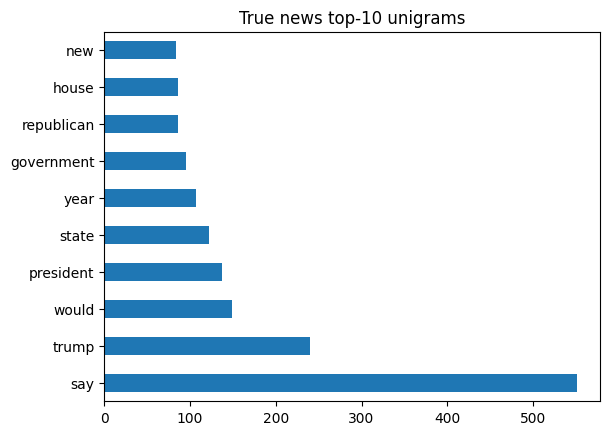

In [45]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 1).plot.barh(title= 'True news top-10 unigrams')

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



<Axes: title={'center': 'True news top-10 bigrams'}>

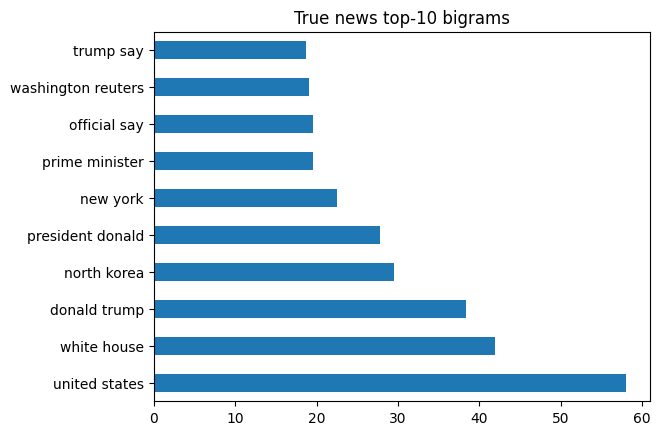

In [46]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 2).plot.barh(title= 'True news top-10 bigrams')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



<Axes: title={'center': 'True news top-10 trigrams'}>

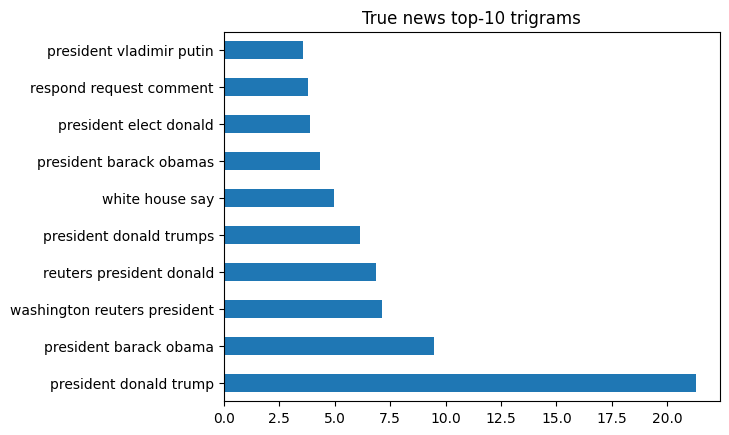

In [47]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 3).plot.barh(title= 'True news top-10 trigrams')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

<Axes: title={'center': 'Fake news top-10 unigrams'}>

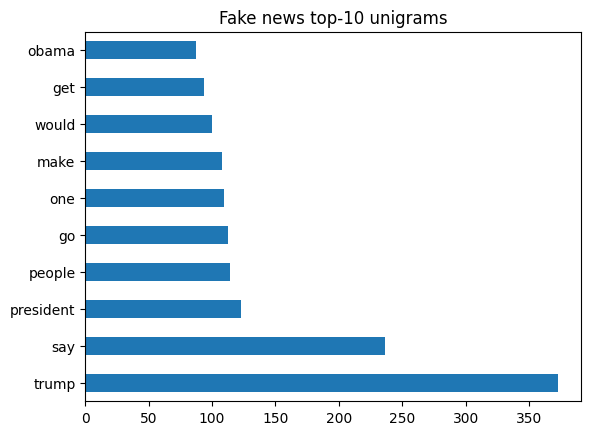

In [48]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 1).plot.barh(title= 'Fake news top-10 unigrams')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



<Axes: title={'center': 'Fake news top-10 bigrams'}>

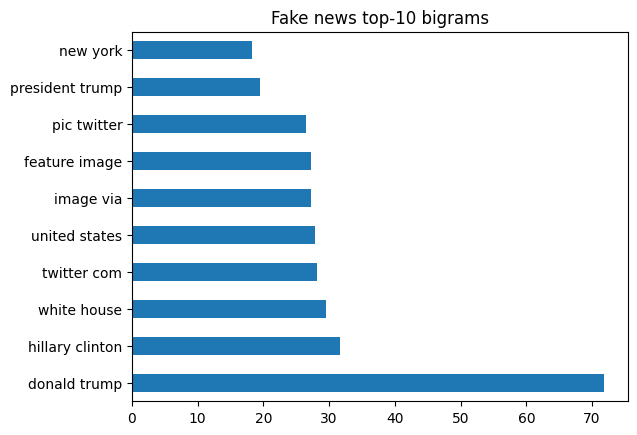

In [49]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 2).plot.barh(title= 'Fake news top-10 bigrams')

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



<Axes: title={'center': 'Fake news top-10 trigrams'}>

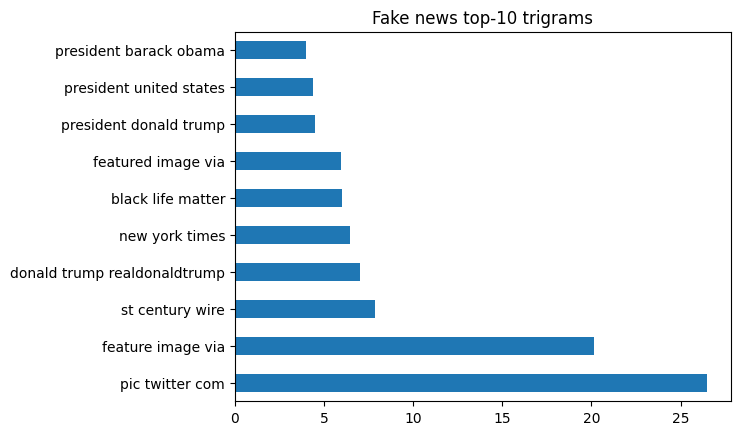

In [50]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 3).plot.barh(title= 'Fake news top-10 trigrams')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [51]:
df_test.head(1)

,news_label,news_text,news_text_lemmatized
16158,0,gop rep asks muslim high school students do you beat your wife video a gop lawmaker in oklahoma raised more than a few eyebrows when before speaking to a group of muslim high school students he presented them with a questionnaire that represented the worst about islamophobia he even asked them do you beat your wife in oklahoma there s an annual muslim day at the capitol which is hosted by the council on american islamic relations students from tulsa s private school for muslims called the p...,gop rep ask muslim high school student beat wife video gop lawmaker oklahoma raise eyebrow speak group muslim high school student present questionnaire represent bad islamophobia even ask beat wife oklahoma annual muslim day capitol host council american islamic relation student tulsa private school muslim call peace academy want visit office rep john bennett would meet suppose fill questionnaire hate group accord adam soltani executive director council american islamic relation oklahoma p...


In [52]:
# Add a new column to calculate the character length of cleaned news text
df_test['news_text_len'] = df_test['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_test['news_text_lemm_len'] = df_test['news_text_lemmatized'].apply(lambda x: len(x))

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

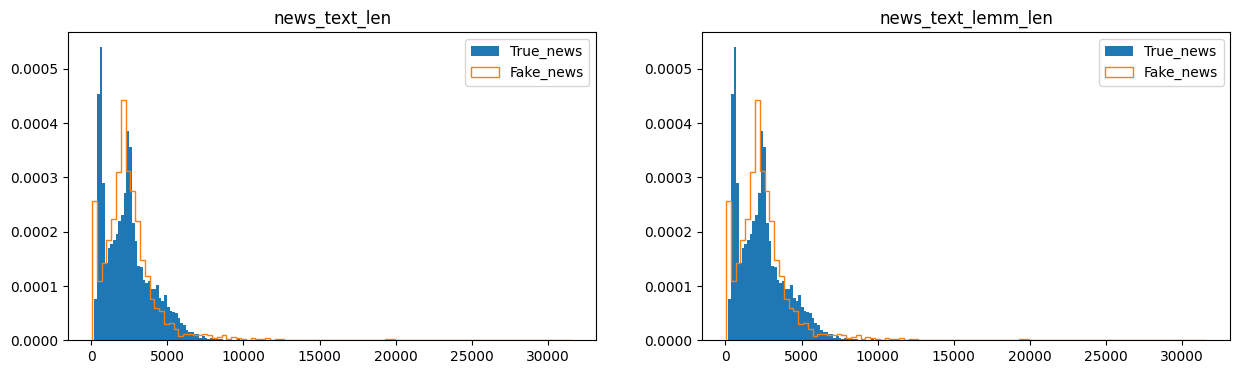

In [53]:
# Create a histogram plot to visualise character lengths
bins= 100
fig, axes = plt.subplots(nrows=1, ncols=2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col in zip(axes, ['news_text_len', 'news_text_lemm_len']):
    ax.hist(df_test.loc[df_test['news_label']==1, 'news_text_len'], bins= bins, density= True, label= 'True_news')
    ax.hist(df_test.loc[df_test['news_label']==0, 'news_text_len'], bins= bins, density= True, histtype='step', label= 'Fake_news')
    ax.set_title(f'{col}')
    ax.legend()

# Add histogram for lemmatized news text with POS tags removed


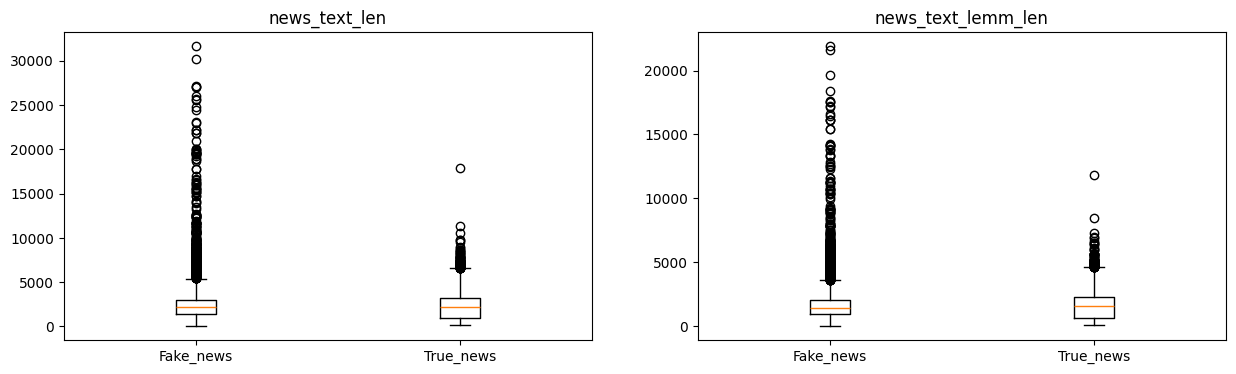

In [54]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add boxplot for cleaned news text
for ax, col in zip(axes, ['news_text_len', 'news_text_lemm_len']):
    ax.boxplot([df_test.loc[df_test['news_label']==val, col].values for val in [0, 1]])
    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    ax.set_title(f'{col}')
    
# Add boxplot for lemmatized news text with POS tags removed

plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

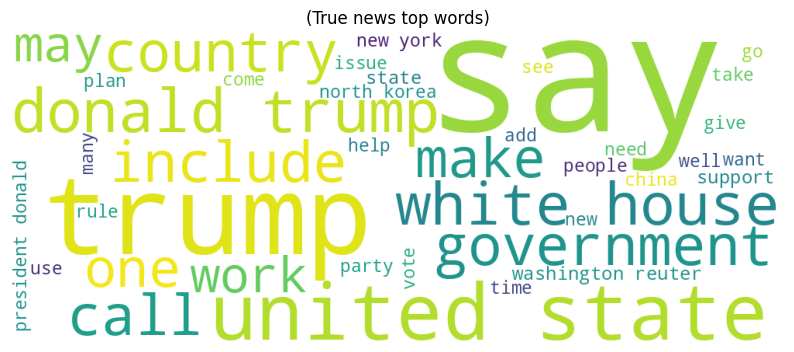

In [55]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
true_news = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(True news top words)')
plt.show()

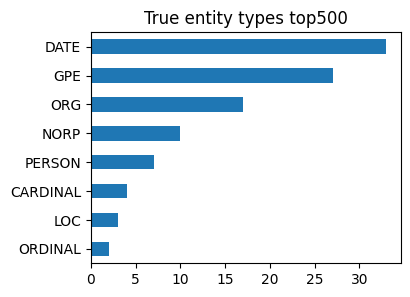

In [56]:
# Get entity types of top 500 words of true news
nwords = 500
get_ent_types(true_string, nwords).sort_values().plot.barh(figsize=(4, 3), title=f'True entity types top{nwords}')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

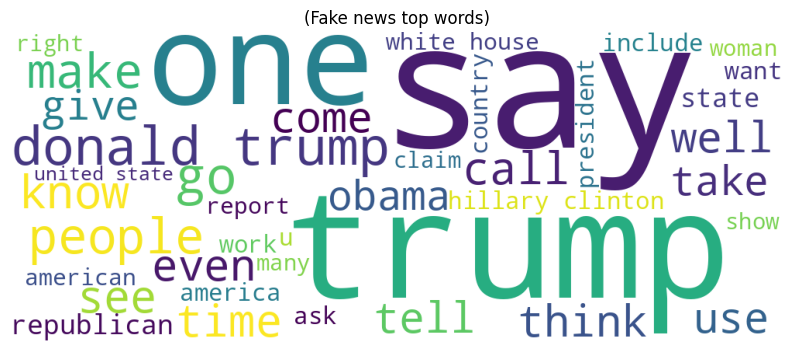

In [57]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
fake_news = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(Fake news top words)')
plt.show()

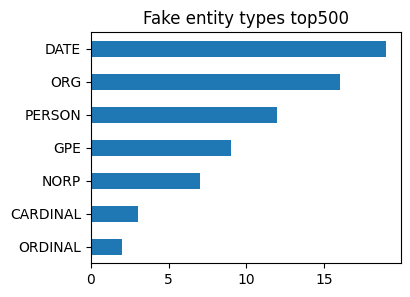

In [58]:
# Get entity types of top 500 words of fake news
nwords = 500
get_ent_types(fake_string, nwords).sort_values().plot.barh(figsize=(4, 3), title=f'Fake entity types top{nwords}')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams, topn=10):
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0) / len(tx_list) * 100).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

##### 5.3.2 Handle the NaN values

In [60]:
## First handle NaN values in the text data
df_test.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

<Axes: title={'center': 'True news top-10 unigrams'}>

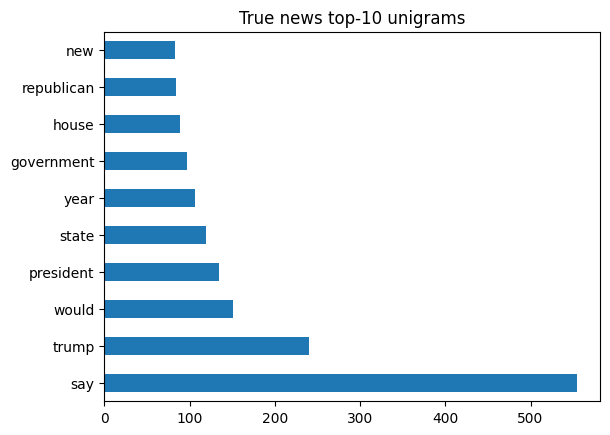

In [61]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 1).plot.barh(title='True news top-10 unigrams')

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

<Axes: title={'center': 'True news top-10 bigrams'}>

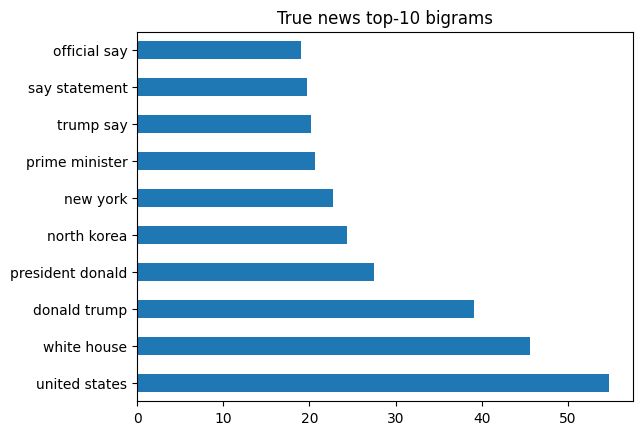

In [62]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 2).plot.barh(title='True news top-10 bigrams')

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

<Axes: title={'center': 'True news top-10 trigrams'}>

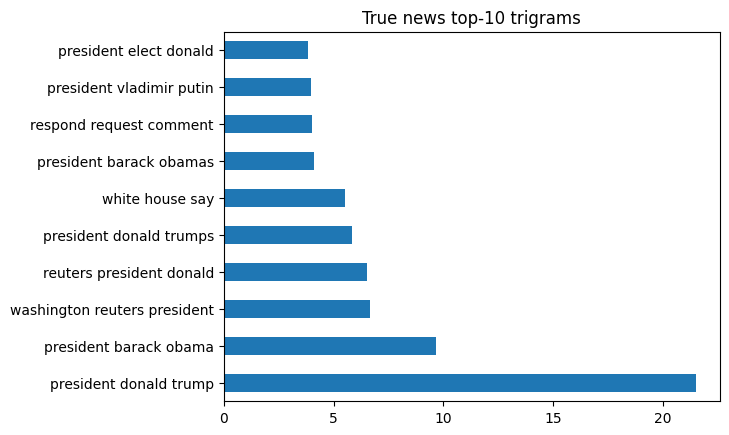

In [63]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
get_ngrams(tx_list, 3).plot.barh(title='True news top-10 trigrams')

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

<Axes: title={'center': 'Fake news top-10 unigrams'}>

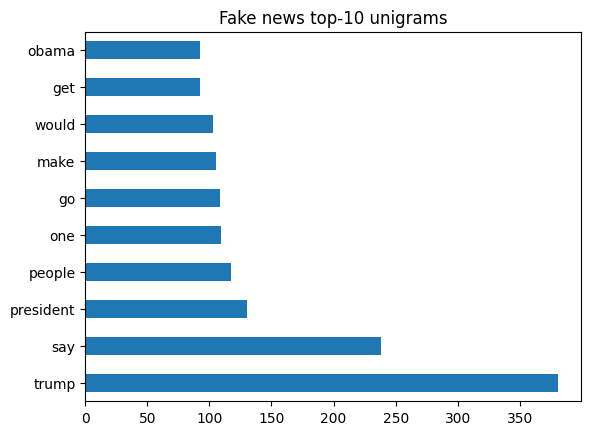

In [64]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 1).plot.barh(title='Fake news top-10 unigrams')

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

<Axes: title={'center': 'Fake news top-10 bigrams'}>

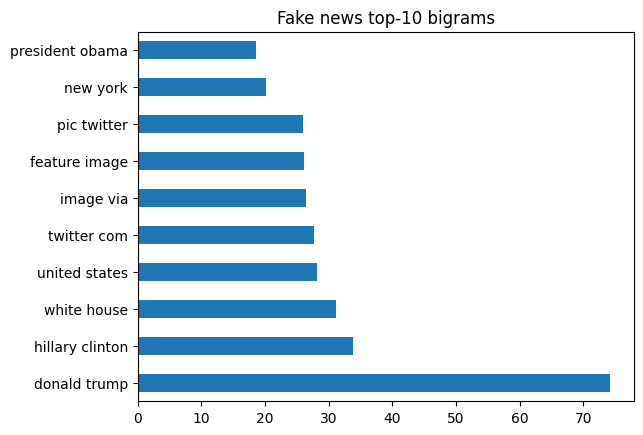

In [65]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 2).plot.barh(title='Fake news top-10 bigrams')

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

<Axes: title={'center': 'Fake news top-10 trigrams'}>

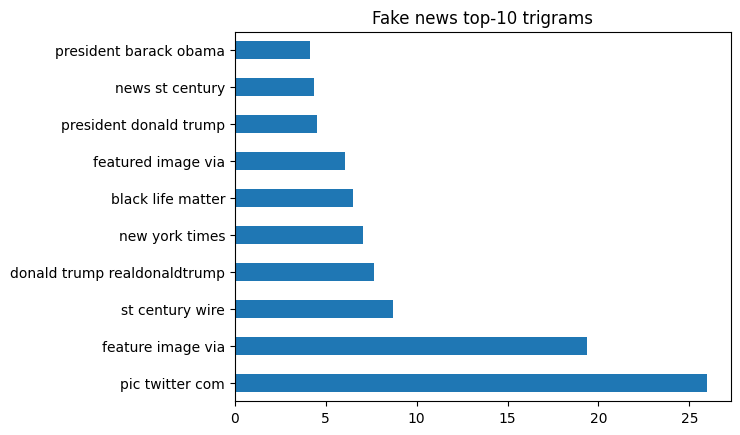

In [66]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
get_ngrams(tx_list, 3).plot.barh(title='Fake news top-10 trigrams')

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [67]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import KeyedVectors
import os
import requests

if not os.path.exists('word2vec-google-news-300.model'):
    url = r'https://huggingface.co/fse/word2vec-google-news-300/resolve/main/word2vec-google-news-300.model'
    response = requests.get(url)
    with open(url.split('/')[-1], 'wb') as file:
        file.write(response.content)

if not os.path.exists('word2vec-google-news-300.model.vectors.npy'):
    url = r'https://huggingface.co/fse/word2vec-google-news-300/resolve/main/word2vec-google-news-300.model.vectors.npy'
    response = requests.get(url)
    with open(url.split('/')[-1], 'wb') as file:
        file.write(response.content)

g300_w2v = KeyedVectors.load('word2vec-google-news-300.model')

# Extract the raw vectors
vectors = g300_w2v.vectors  # NumPy array of word embeddings
print(vectors.shape)  # Check dimensions


(3000000, 300)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [225]:
# Function to extract Frobenius norm of sentence word vectors
def mat_norm(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
              for word in text.split()])
    return np.linalg.norm(V)

In [223]:
# Function to extract sentence vector as unit vector of vector sum of all word vectors (more std than mean)
def unit_vec(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
              for word in text.split()])
    V = V.mean(axis= 0)
    return V / np.linalg.norm(V)

In [226]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
scaler_std = StandardScaler()
tfidf = TfidfVectorizer()

X_train, X_test= [], []

# Extract normalized lengths of lemmatized text
X_train = scaler_std.fit_transform(np.c_[df_train['news_text_lemm_len'].values])
X_test = scaler_std.transform(np.c_[df_test['news_text_lemm_len'].values])

# Extract sentence vectors for lemmatized text
V_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    V_train.append(unit_vec(tx))
V_train = np.array(V_train).reshape(len(df_train), 300)

V_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    V_test.append(unit_vec(tx))
V_test = np.array(V_test).reshape(len(df_test), 300)

# Extract normalized Frobenius norm of sentence matrix
N_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    N_train.append(mat_norm(tx))
N_train = np.c_[np.array(N_train)]
N_train = scaler_std.fit_transform(N_train)

N_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    N_test.append(mat_norm(tx))
N_test = np.c_[np.array(N_test)]
N_test = scaler_std.transform(N_test)

# Extract tfidf of entity types in a sentence
ENT_train = []
ent_train = df_train['news_text_lemmatized'].progress_apply(lambda x: ' '.join([tok.ent_type_ for tok in nlp(x)]))
tfidf_train = tfidf.fit_transform(ent_train)
ENT_train = tfidf_train.toarray()

ENT_test = []
ent_test = df_test['news_text_lemmatized'].progress_apply(lambda x: ' '.join([tok.ent_type_ for tok in nlp(x)]))
tfidf_test = tfidf.fit_transform(ent_test)
ENT_test = tfidf_test.toarray()

# Stack feature variables 
X_train = np.hstack([X_train, N_train, ENT_train, V_train])
X_test = np.hstack([X_test, N_test, ENT_test, V_test])

## Extract the target variable for the training data and validation data
y_train = np.c_[df_train['news_label']]
y_test = np.c_[df_test['news_label']]

print(X_train.shape)
print(X_test.shape)

100%|██████████| 13470/13470 [03:20<00:00, 67.21it/s]


(31428, 320)
(13470, 320)


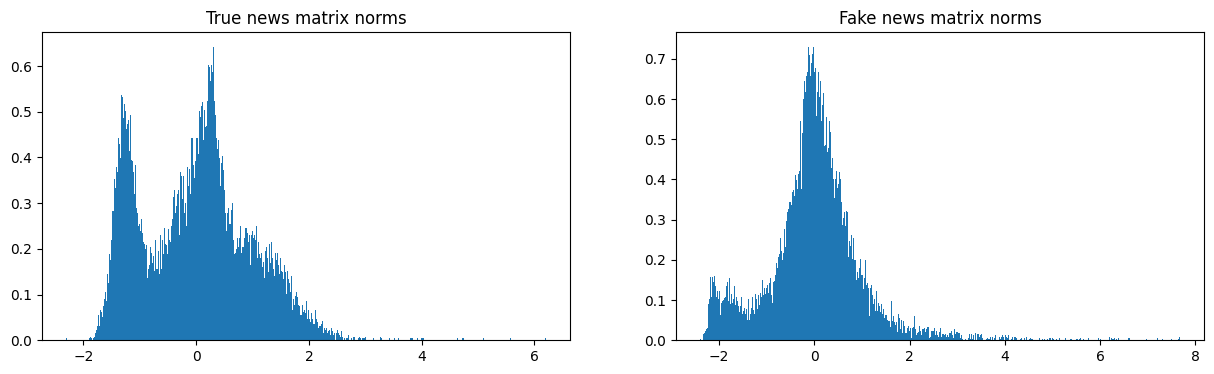

In [265]:
# Visualizing standardized sentence matrix norms for true and fake news
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1).hist(N_train[df_train['news_label']==1], density= True, bins=500)
plt.title('True news matrix norms')
plt.subplot(1, 2, 2).hist(N_train[df_train['news_label']==0], density= True, bins=500)
plt.title('Fake news matrix norms')
plt.show()

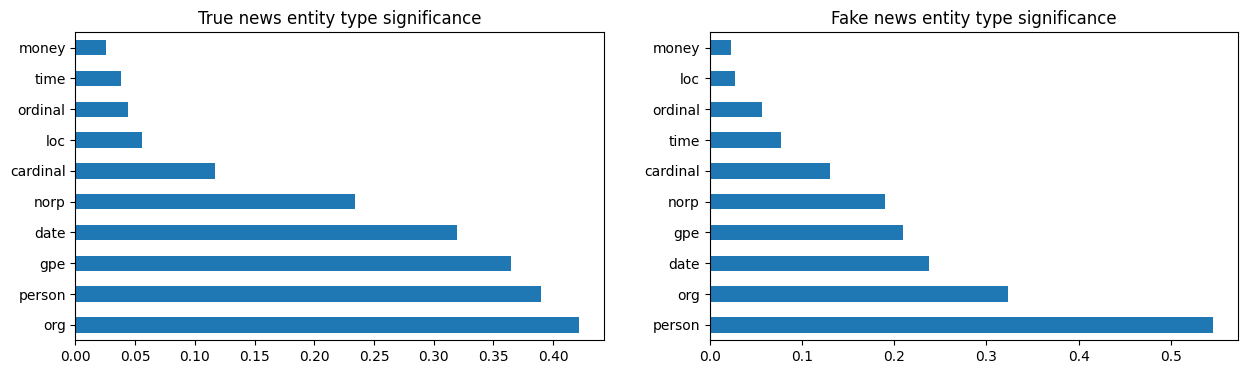

In [266]:
# Visualize TfIdf significance of news classes
ENT_sigfnc_true = pd.Series(ENT_train[df_train['news_label']==1].mean(axis=0), index= tfidf.get_feature_names_out())
ENT_sigfnc_fake = pd.Series(ENT_train[df_train['news_label']==0].mean(axis=0), index= tfidf.get_feature_names_out())

plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1, 2, 1)
ENT_sigfnc_true.sort_values(ascending= False).head(10).plot.barh(ax= ax1, title='True news entity type significance')

ax2 = plt.subplot(1, 2, 2)
ENT_sigfnc_fake.sort_values(ascending= False).head(10).plot.barh(ax= ax2, title='Fake news entity type significance')

plt.show()

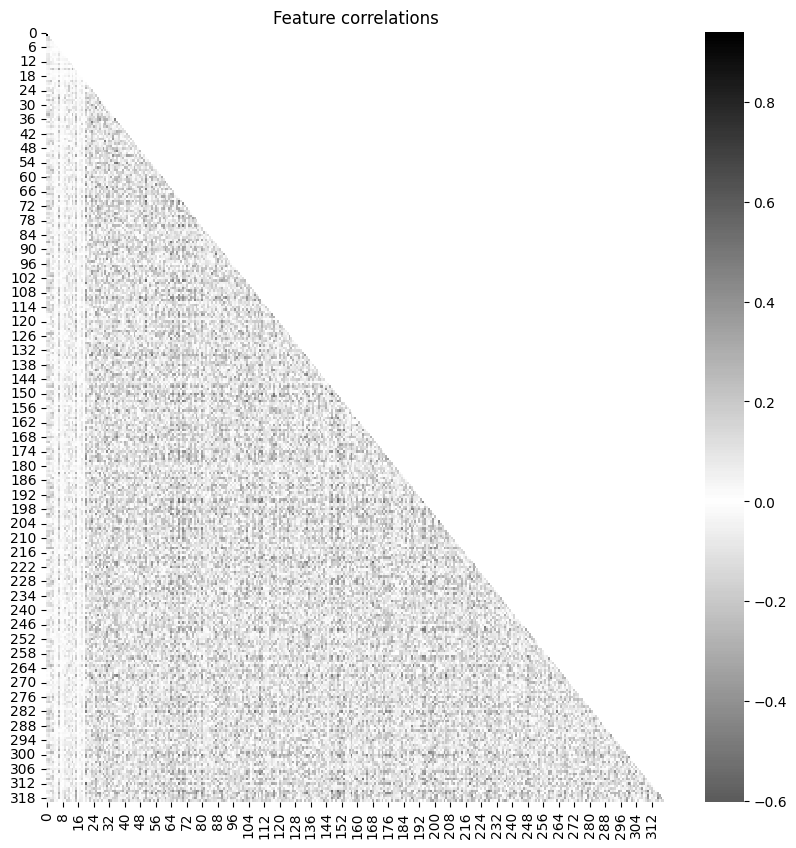

In [228]:
# Visualizing correlation between features
from matplotlib.colors import LinearSegmentedColormap

gray_scale = [
    (0, 'black'),
    (0.25, 'grey'),
    (0.5, 'white'),
    (0.75, 'grey'),
    (1.0, 'black')
    ]
custom_cmap = LinearSegmentedColormap.from_list('Heatmap_gray_scale', gray_scale)

df = pd.DataFrame(X_train).corr()

plt.figure(figsize=(10, 10))
plt.title('Feature correlations')
sns.heatmap(df, mask= np.triu(df), cmap= custom_cmap, center= 0)
plt.show()

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [230]:
## Initialise Logistic Regression model
log_reg = LogisticRegression()
lr_params = {
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr_grid = GridSearchCV(
    estimator= log_reg,
    param_grid= lr_params,
    scoring= 'f1',
    cv= 4,
    n_jobs= -1
)

## Train Logistic Regression model on training data
lr_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = lr_grid.predict(X_test)

In [231]:
lr_grid.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [232]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.3f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.3f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.3f}')

Accuracy: 0.959
Precision: 0.955
Recall: 0.960
F1 score: 0.957


In [233]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7045
           1       0.95      0.96      0.96      6425

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



In [234]:
print(confusion_matrix(y_test, y_test_pred))

[[6754  291]
 [ 259 6166]]


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
tree = DecisionTreeClassifier(criterion='entropy')
dt_params = {
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(
    estimator= tree,
    param_grid= dt_params,
    scoring= 'f1',
    cv= 4,
    n_jobs= -1
)

## Train Decision Tree model on training data
dt_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = dt_grid.predict(X_test)

In [236]:
dt_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [237]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.3f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.3f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.3f}')

Accuracy: 0.881
Precision: 0.886
Recall: 0.862
F1 score: 0.874


In [238]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7045
           1       0.89      0.86      0.87      6425

    accuracy                           0.88     13470
   macro avg       0.88      0.88      0.88     13470
weighted avg       0.88      0.88      0.88     13470



In [239]:
print(confusion_matrix(y_test, y_test_pred))

[[6335  710]
 [ 889 5536]]


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [245]:
## Initialise Random Forest model
rf = RandomForestClassifier(bootstrap= True, oob_score= True, criterion='entropy')
rf_params = {
    'n_estimators': [150, 200],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
}

rf_grid = GridSearchCV(
    estimator= rf,
    param_grid= rf_params,
    scoring= 'f1',
    cv= 4,
    n_jobs= -1
)

## Train Random Forest model on training data
rf_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = rf_grid.predict(X_test)

In [246]:
rf_grid.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [247]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.3f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.3f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.3f}')

Accuracy: 0.943
Precision: 0.946
Recall: 0.933
F1 score: 0.940


In [248]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7045
           1       0.95      0.93      0.94      6425

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [249]:
print(confusion_matrix(y_test, y_test_pred))

[[6702  343]
 [ 429 5996]]


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

EDA findings:
1. Average word length of both true and fake news are similar. Both sets show double peaks, but the magnitude of peaks are opposite to the other. Spread of word lengths for fake news is more than true news. This shows lack of institutionalized editing standards in case of fake news. Thus word lenghts can be used as feature for model training.
2. The true news and fake news wordclouds and the respective entity type counts show that true news is more about geopolitical entities than persons. This shows that fake news target personalities more than actual facts. This characteristic can also be used for model training.
3. Top 10 trigrams for fake news contain subject matters and sources while that of true news more about political persons and geopolitical entities. This indicates that fake news are directed more towards convincing the consumers that delivering facts.

Approach to model building:
1. Cleaning text by removing punctuations, number, special characters and converting to lower case.
2. Lemmatizing text by keeping only the NN, NNS tags because nouns carry the most of the semantic sense of a text (many verbs are generated from nouns as well like, I googled the meaning of the term).
3. Creating word vectors by using word2vec-google-news-300 pre-trained model. It is a 300 dimension vector-model of 3 million words.
4. Extracting sentence vectors by taking the vector mean of all its words. Vector sum is the resultant of all the components of the vectors and averaging it will scale the resultant down to one word. This encapsulates all the semantic sense of the words in text into a single word.
5. Extracting the Frobenius norm of the sentence matrix composed of vectors of all its words and standardizing across all documents. This signifies the distance of the sentence matrix from origin.
6. Extracting the lemmatized text length and standardizing across all documents. Since length is a determining characteristic between true and fake news as per EDA.
7. Extracting the most common Named_Entity_Type from text and standardizing across all documents. Most common entity carries the main semantic theme of a text.
8. Hyper-parameters of the models are tuned using GridSearchCV

Evaluation metric: 
- F1 score is chosen as the best metric because it balances both precision and recall
- Since both target classes are more or less balanced, both precision and recall can be prioritised instead of only recall
- Mis-identifying true news as fake and fake news as true can be equally damaging to the reader

Best model: Logistic Regression (regularization: l1, solver: liblinear) [Accuracy: 0.95, Precision: 0.945, Recall: 0.955, F1: 0.95]
- Low variance model and in this instance it has the highest scores amongst all three models of DecisionTree, RandomForest
- Simpler model can suffice for a binary classification
- Design matrix is not a sparse matrix
- Very low correlations between feature variables
- Takes less time to train